<a href="https://colab.research.google.com/github/ishahmshah1025/SIH-2024/blob/main/SIH-2024/Prediction%20Models/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Placement Statistics of College

In [ ]:
placement = pd.read_csv('placement.csv')
placement

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Academic Year,No. of Students Enrolled,No. of Students Placed,Placement Percentage
1,2017 -18,617,405,66
2,2018-19,631,523,82.88
3,2019-20,659,555,84.21
4,2020-21,720,661,91.8
5,2021-22,730,671,91.91
6,2022-23,755,707,93.64
7,2023-24,750,668,89.06


In [ ]:

data = {
    "Academic Year": [
        "2017-18",
        "2018-19",
        "2019-20",
        "2020-21",
        "2021-22",
        "2022-23",
        "2023-24"
    ],
    "No_of_Students_Enrolled": [617, 631, 659, 720, 730, 755, 750],
    "No_of_Students_Placed": [405, 523, 555, 661, 671, 707, 668],
    "Placement_Percentage": [66, 82.88, 84.21, 91.8, 91.91, 93.64, 89.06]
}

df = pd.DataFrame(data)
df

df['academic_years'] = [i for i in range(len(df))]


X = df[['academic_years', 'No_of_Students_Enrolled']]
y = df['No_of_Students_Placed']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
y_pred, mae


(array([588.43, 588.43, 668.89]), 95.65666666666664)

Very slight error is there in predicted values

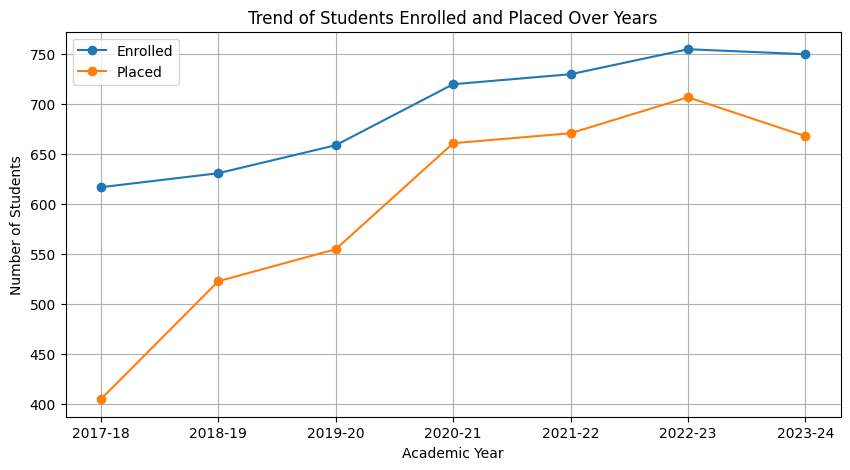

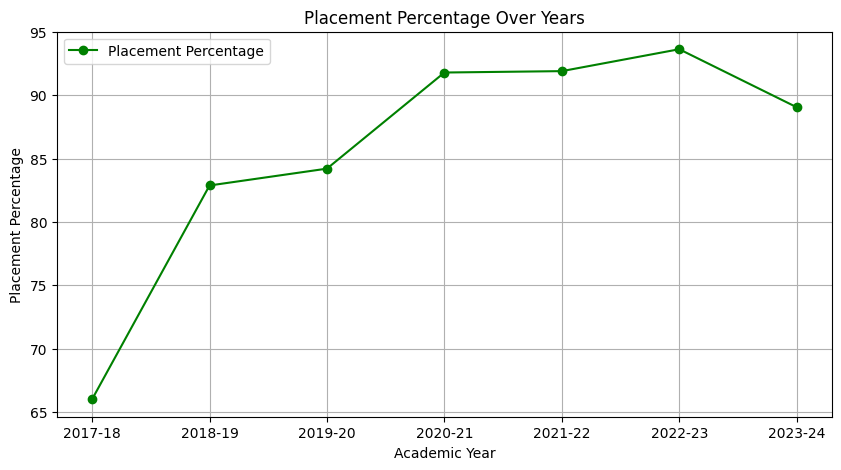

In [ ]:
import matplotlib.pyplot as plt

# Enrollment vs Placement over the Years
plt.figure(figsize=(10, 5))
plt.plot(df['Academic Year'], df['No_of_Students_Enrolled'], label='Enrolled', marker='o')
plt.plot(df['Academic Year'], df['No_of_Students_Placed'], label='Placed', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.title('Trend of Students Enrolled and Placed Over Years')
plt.legend()
plt.grid(True)
plt.show()

#  Placement Percentage Over the Years
plt.figure(figsize=(10, 5))
plt.plot(df['Academic Year'], df['Placement_Percentage'], label='Placement Percentage', color='green', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Placement Percentage')
plt.title('Placement Percentage Over Years')
plt.legend()
plt.grid(True)
plt.show()




Identifying if the placement percentage is declining over time

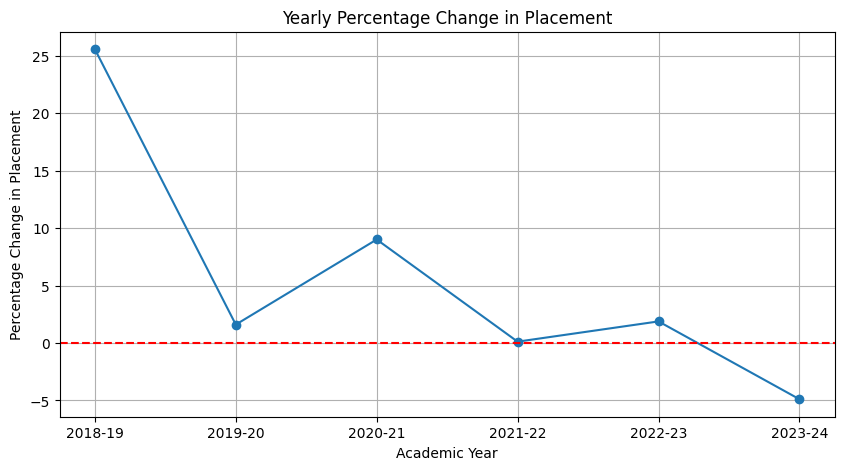

Years with a decline in Placement Percentage: ['2023-24']


In [ ]:

df['Placement_Percentage_Change'] = df['Placement_Percentage'].pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(df['Academic Year'], df['Placement_Percentage_Change'], marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Academic Year')
plt.ylabel('Percentage Change in Placement')
plt.title('Yearly Percentage Change in Placement')
plt.grid(True)
plt.show()

# pattern of decline
decline_years = df[df['Placement_Percentage_Change'] < 0]['Academic Year']
print(f"Years with a decline in Placement Percentage: {decline_years.tolist()}")


Enrollment Growth and Placement Growth

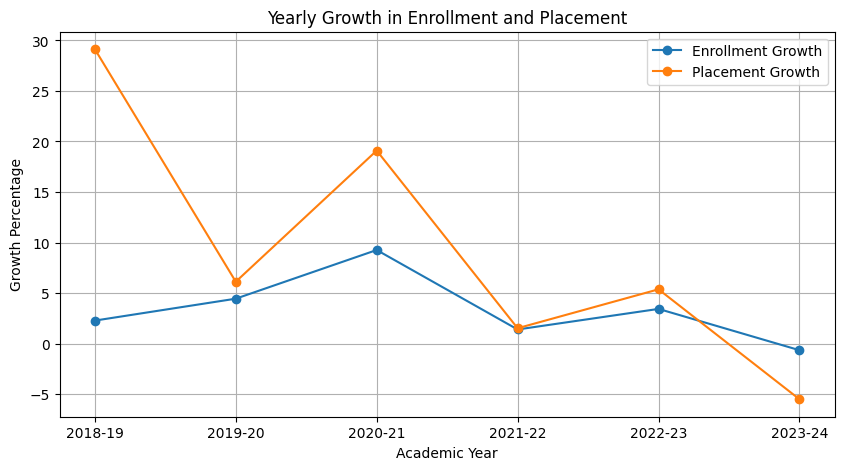

  Academic Year  Enrollment_Growth  Placement_Growth
0       2017-18                NaN               NaN
1       2018-19           2.269044         29.135802
2       2019-20           4.437401          6.118547
3       2020-21           9.256449         19.099099
4       2021-22           1.388889          1.512859
5       2022-23           3.424658          5.365127
6       2023-24          -0.662252         -5.516266


In [ ]:
df['Enrollment_Growth'] = df['No_of_Students_Enrolled'].pct_change() * 100
df['Placement_Growth'] = df['No_of_Students_Placed'].pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(df['Academic Year'], df['Enrollment_Growth'], label='Enrollment Growth', marker='o')
plt.plot(df['Academic Year'], df['Placement_Growth'], label='Placement Growth', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Growth Percentage')
plt.title('Yearly Growth in Enrollment and Placement')
plt.legend()
plt.grid(True)
plt.show()

print(df[['Academic Year', 'Enrollment_Growth', 'Placement_Growth']])


# CSE statistics

In [ ]:
cse = pd.read_csv('CS placement.csv')
cse

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Academic Year,No.of Students Enrolled,No. of Students Placed,Placement Percentage
1,2017 -18,278,184,66
2,2018-19,262,239,90.53
3,2019-20,279,254,91.36
4,2020-21,283,269,94.71
5,2021-22,265,249,93.96
6,2022-23,279,273,97.5
7,2023-24,317,286,90


In [ ]:


data2 = {
    "Academic Year": [
        "2017-18",
        "2018-19",
        "2019-20",
        "2020-21",
        "2021-22",
        "2022-23",
        "2023-24"
    ],
    'No_of_Students_Enrolled_cse': [278, 262, 279, 283, 265, 279, 320],
    'No_of_Students_Placed_cse': [184, 239, 254, 269, 249, 273, 286],
    'Placement_Percentage_cse': [66, 90.53, 91.36, 94.71, 93.96, 97.5, 90]
}

df2 = pd.DataFrame(data2)

df2['academic_years'] = [i for i in range(len(df))]
df2



# Features and target
X = df2[['academic_years','No_of_Students_Enrolled_cse' ]]
y = df2['No_of_Students_Placed_cse']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
y_pred, mae


(array([257.82, 253.62, 262.67]), 32.923333333333325)

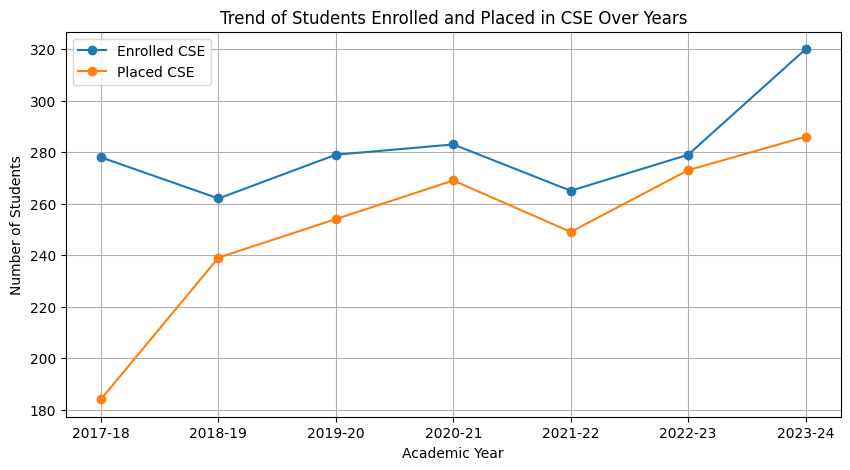

In [ ]:


# Enrollment vs Placement over the Years for CSE
plt.figure(figsize=(10, 5))
plt.plot(df2['Academic Year'], df2['No_of_Students_Enrolled_cse'], label='Enrolled CSE', marker='o')
plt.plot(df2['Academic Year'], df2['No_of_Students_Placed_cse'], label='Placed CSE', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.title('Trend of Students Enrolled and Placed in CSE Over Years')
plt.legend()
plt.grid(True)
plt.show()


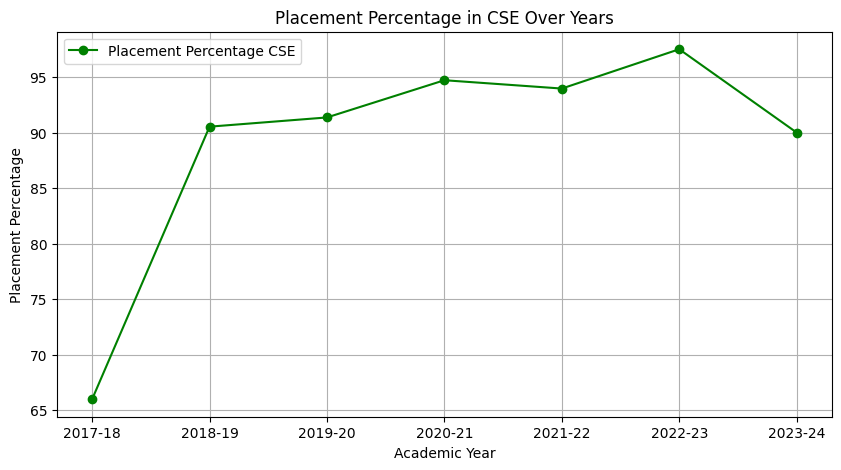

In [ ]:
# Placement Percentage Over the Years for CSE
plt.figure(figsize=(10, 5))
plt.plot(df2['Academic Year'], df2['Placement_Percentage_cse'], label='Placement Percentage CSE', color='green', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Placement Percentage')
plt.title('Placement Percentage in CSE Over Years')
plt.legend()
plt.grid(True)
plt.show()


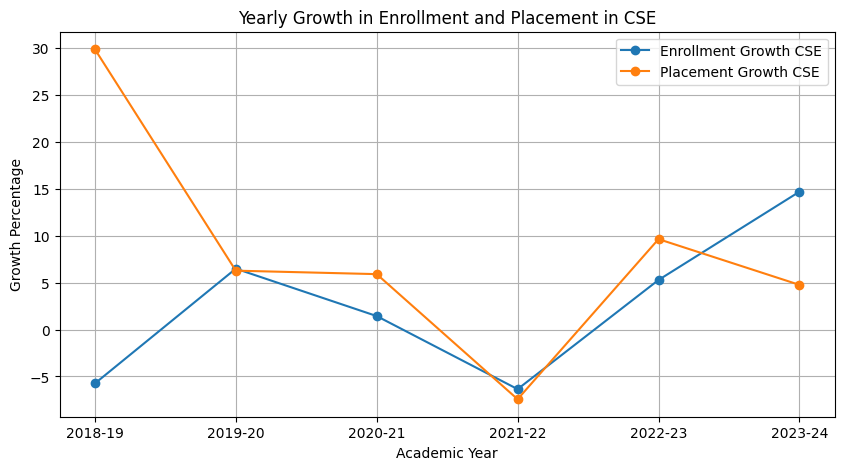

  Academic Year  Enrollment_Growth_cse  Placement_Growth_cse
0       2017-18                    NaN                   NaN
1       2018-19              -5.755396             29.891304
2       2019-20               6.488550              6.276151
3       2020-21               1.433692              5.905512
4       2021-22              -6.360424             -7.434944
5       2022-23               5.283019              9.638554
6       2023-24              14.695341              4.761905


In [ ]:
df2['Enrollment_Growth_cse'] = df2['No_of_Students_Enrolled_cse'].pct_change() * 100
df2['Placement_Growth_cse'] = df2['No_of_Students_Placed_cse'].pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(df2['Academic Year'], df2['Enrollment_Growth_cse'], label='Enrollment Growth CSE', marker='o')
plt.plot(df2['Academic Year'], df2['Placement_Growth_cse'], label='Placement Growth CSE', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Growth Percentage')
plt.title('Yearly Growth in Enrollment and Placement in CSE')
plt.legend()
plt.grid(True)
plt.show()

print(df2[['Academic Year', 'Enrollment_Growth_cse', 'Placement_Growth_cse']])


#IT Placement Stats

In [ ]:
it=pd.read_csv('IT placement.csv')
it

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Academic Year,No.of Students Enrolled,No. of Students Placed,Placement Percentage
1,2017 -18,130,96,73.28
2,2018-19,120,104,87.4
3,2019-20,136,122,89.7
4,2020-21,200,190,95
5,2021-22,195,186,95.38
6,2022-23,225,210,93.33
7,2023-24,208,181,87


In [ ]:


data3 = {
    "Academic Year": [
        "2017-18",
        "2018-19",
        "2019-20",
        "2020-21",
        "2021-22",
        "2022-23",
        "2023-24"
    ],
    "No_of_Students_Enrolled_it": [130, 120, 136, 200, 195, 225, 208],
    "No_of_Students_Placed_it": [96, 104, 122, 190, 186, 210, 181],
    "Placement_Percentage_it": [73.28, 87.4, 89.7, 95, 95.38, 93.33, 87]
}

df3 = pd.DataFrame(data3)

df3['academic_years'] = [i for i in range(len(df3))]
df3



# Features and target
X = df3[['academic_years','No_of_Students_Enrolled_it' ]]
y = df3['No_of_Students_Placed_it']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)

y_pred
mae


36.89666666666667

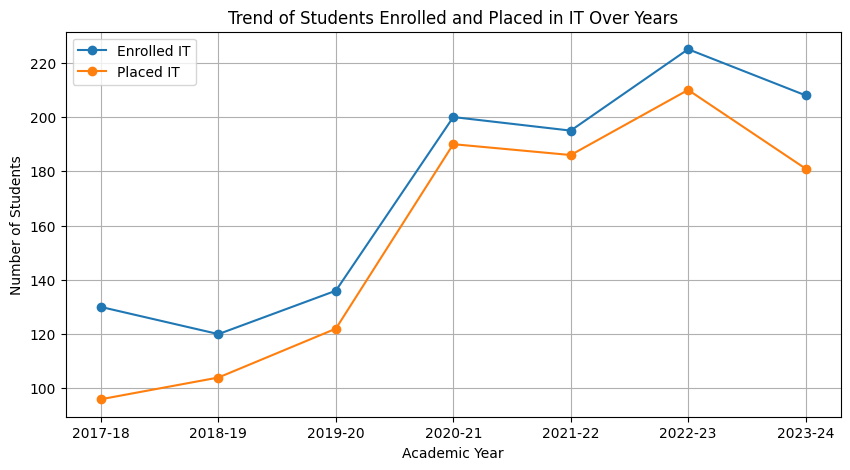

In [ ]:
#  Enrollment vs Placement over the Years for IT
plt.figure(figsize=(10, 5))
plt.plot(df3['Academic Year'], df3['No_of_Students_Enrolled_it'], label='Enrolled IT', marker='o')
plt.plot(df3['Academic Year'], df3['No_of_Students_Placed_it'], label='Placed IT', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.title('Trend of Students Enrolled and Placed in IT Over Years')
plt.legend()
plt.grid(True)
plt.show()


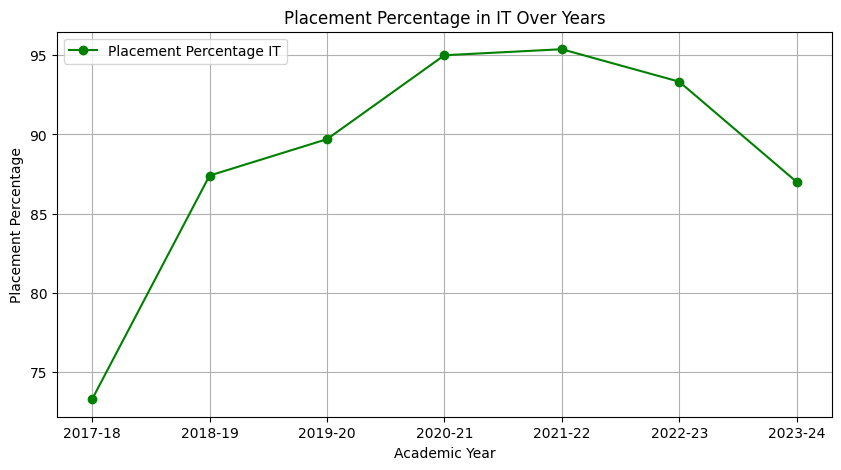

In [ ]:
# Placement Percentage Over the Years for IT
plt.figure(figsize=(10, 5))
plt.plot(df3['Academic Year'], df3['Placement_Percentage_it'], label='Placement Percentage IT', color='green', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Placement Percentage')
plt.title('Placement Percentage in IT Over Years')
plt.legend()
plt.grid(True)
plt.show()


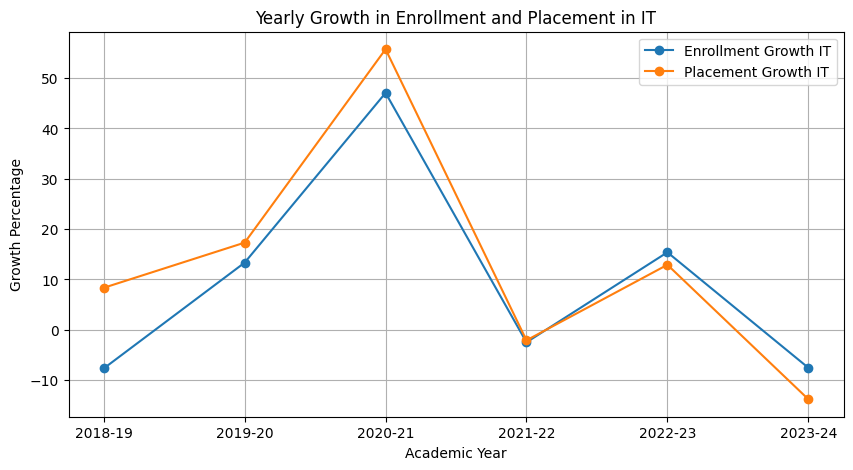

  Academic Year  Enrollment_Growth_it  Placement_Growth_it
0       2017-18                   NaN                  NaN
1       2018-19             -7.692308             8.333333
2       2019-20             13.333333            17.307692
3       2020-21             47.058824            55.737705
4       2021-22             -2.500000            -2.105263
5       2022-23             15.384615            12.903226
6       2023-24             -7.555556           -13.809524


In [ ]:
df3['Enrollment_Growth_it'] = df3['No_of_Students_Enrolled_it'].pct_change() * 100
df3['Placement_Growth_it'] = df3['No_of_Students_Placed_it'].pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(df3['Academic Year'], df3['Enrollment_Growth_it'], label='Enrollment Growth IT', marker='o')
plt.plot(df3['Academic Year'], df3['Placement_Growth_it'], label='Placement Growth IT', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Growth Percentage')
plt.title('Yearly Growth in Enrollment and Placement in IT')
plt.legend()
plt.grid(True)
plt.show()

print(df3[['Academic Year', 'Enrollment_Growth_it', 'Placement_Growth_it']])


# ENTC Placement


In [ ]:


data4 = {
    "Academic Year": [
        "2017-18",
        "2018-19",
        "2019-20",
        "2020-21",
        "2021-22",
        "2022-23",
        "2023-24"
    ],
    "No_of_Students_Enrolled_entc": [255,248,245,236,260,245,222],
    "No_of_Students_Placed_entc": [125,180,179,202,236,224,200],
    "Placement_Percentage_entc": [50.8,72.58,73.06,85.59,90.07,91.42,90]}

df4 = pd.DataFrame(data4)

df4['academic_years'] = [i for i in range(len(df4))]
df4



X = df4[['academic_years','No_of_Students_Enrolled_entc' ]]
y = df4['No_of_Students_Placed_entc']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)

y_pred
mae


40.25666666666667

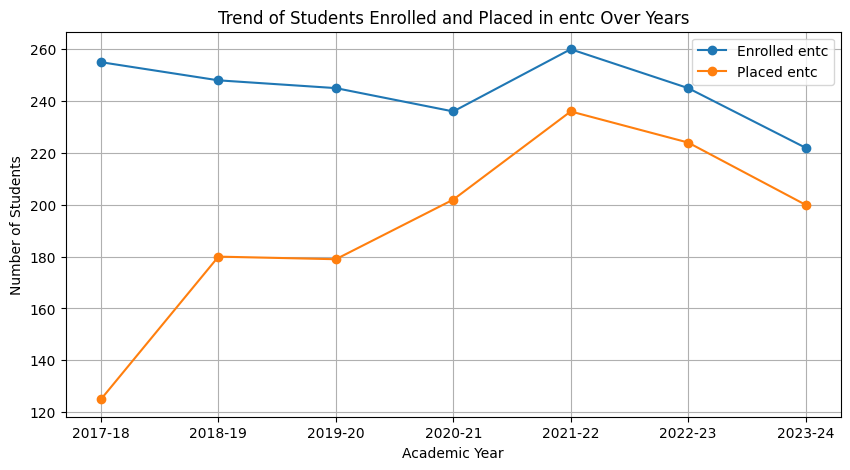

In [ ]:
#  Enrollment vs Placement over the Years for ENTC
plt.figure(figsize=(10, 5))
plt.plot(df4['Academic Year'], df4['No_of_Students_Enrolled_entc'], label='Enrolled entc', marker='o')
plt.plot(df4['Academic Year'], df4['No_of_Students_Placed_entc'], label='Placed entc', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.title('Trend of Students Enrolled and Placed in entc Over Years')
plt.legend()
plt.grid(True)
plt.show()


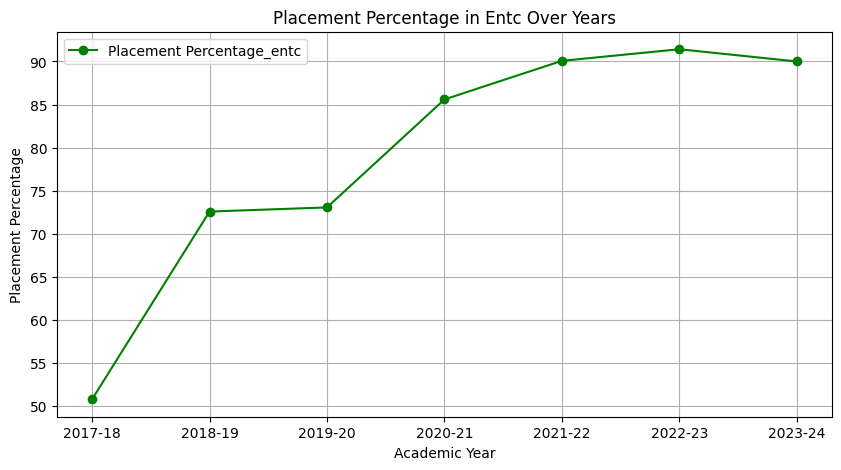

In [ ]:
# Placement Percentage Over the Years for ENTC
plt.figure(figsize=(10, 5))
plt.plot(df4['Academic Year'], df4['Placement_Percentage_entc'], label='Placement Percentage_entc', color='green', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Placement Percentage')
plt.title('Placement Percentage in Entc Over Years')
plt.legend()
plt.grid(True)
plt.show()


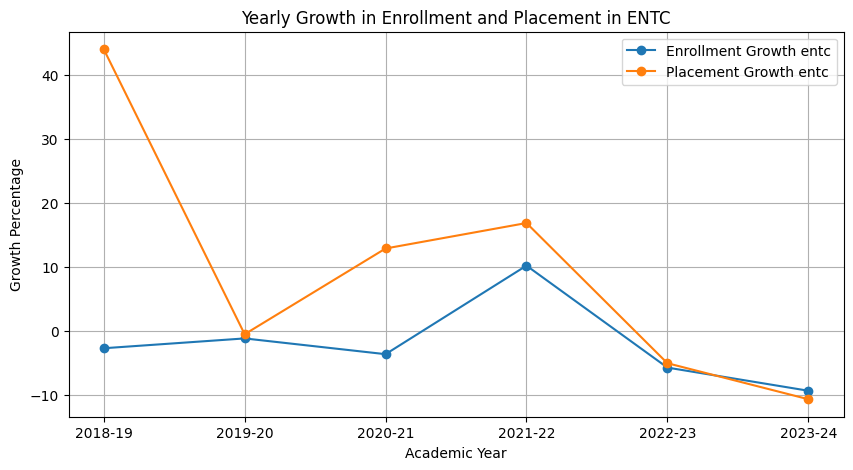

  Academic Year  Enrollment_Growth_entc  Placement_Growth_entc
0       2017-18                     NaN                    NaN
1       2018-19               -2.745098              44.000000
2       2019-20               -1.209677              -0.555556
3       2020-21               -3.673469              12.849162
4       2021-22               10.169492              16.831683
5       2022-23               -5.769231              -5.084746
6       2023-24               -9.387755             -10.714286


In [ ]:
df4['Enrollment_Growth_entc'] = df4['No_of_Students_Enrolled_entc'].pct_change() * 100
df4['Placement_Growth_entc'] = df4['No_of_Students_Placed_entc'].pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(df4['Academic Year'], df4['Enrollment_Growth_entc'], label='Enrollment Growth entc', marker='o')
plt.plot(df4['Academic Year'], df4['Placement_Growth_entc'], label='Placement Growth entc', marker='o')
plt.xlabel('Academic Year')
plt.ylabel('Growth Percentage')
plt.title('Yearly Growth in Enrollment and Placement in ENTC')
plt.legend()
plt.grid(True)
plt.show()

print(df4[['Academic Year', 'Enrollment_Growth_entc', 'Placement_Growth_entc']])


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df, df2, df3, and df4 are already defined as per your provided data

# Define a function to train the model and make predictions
def train_and_predict(df, target_column, input_features, total_students_column):
    # Split the data into training and testing sets
    X = df[input_features]
    y = df[target_column]

    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Allow the user to input values and predict the number of students placed
    user_input = {}
    for feature in input_features:
        user_input[feature] = [float(input(f"Enter {feature.replace('_', ' ')}: "))]

    user_data = pd.DataFrame(user_input)
    predicted_value = model.predict(user_data)[0]

    # Calculate the predicted placement percentage
    predicted_percentage = (predicted_value / user_input[total_students_column][0]) * 100

    return predicted_value, predicted_percentage

# Overall placement prediction
print("\n--- Overall Placement Prediction ---")
overall_features = ['academic_years', 'No_of_Students_Enrolled']
overall_pred, overall_percentage = train_and_predict(df, 'No_of_Students_Placed', overall_features, 'No_of_Students_Enrolled')
print(f"Predicted Number of Students Placed (Overall): {round(overall_pred)}")
print(f"Predicted Placement Percentage (Overall): {round(overall_percentage, 2)}%")

# CSE placement prediction
print("\n--- CSE Placement Prediction ---")
cse_features = ['academic_years', 'No_of_Students_Enrolled_cse']
cse_pred, cse_percentage = train_and_predict(df2, 'No_of_Students_Placed_cse', cse_features, 'No_of_Students_Enrolled_cse')
print(f"Predicted Number of Students Placed (CSE): {round(cse_pred)}")
print(f"Predicted Placement Percentage (CSE): {round(cse_percentage, 2)}%")

# IT placement prediction
print("\n--- IT Placement Prediction ---")
it_features = ['academic_years', 'No_of_Students_Enrolled_it']
it_pred, it_percentage = train_and_predict(df3, 'No_of_Students_Placed_it', it_features, 'No_of_Students_Enrolled_it')
print(f"Predicted Number of Students Placed (IT): {round(it_pred)}")
print(f"Predicted Placement Percentage (IT): {round(it_percentage, 2)}%")

# ENTC placement prediction
print("\n--- ENTC Placement Prediction ---")
entc_features = ['academic_years', 'No_of_Students_Enrolled_entc']
entc_pred, entc_percentage = train_and_predict(df4, 'No_of_Students_Placed_entc', entc_features, 'No_of_Students_Enrolled_entc')
print(f"Predicted Number of Students Placed (ENTC): {round(entc_pred)}")
print(f"Predicted Placement Percentage (ENTC): {round(entc_percentage, 2)}%")



--- Overall Placement Prediction ---
Enter academic years: 7
Enter No of Students Enrolled: 750
Predicted Number of Students Placed (Overall): 681
Predicted Placement Percentage (Overall): 90.79%

--- CSE Placement Prediction ---
Enter academic years: 7
Enter No of Students Enrolled cse: 320
Predicted Number of Students Placed (CSE): 280
Predicted Placement Percentage (CSE): 87.55%

--- IT Placement Prediction ---
Enter academic years: 7
Enter No of Students Enrolled it: 220
Predicted Number of Students Placed (IT): 200
Predicted Placement Percentage (IT): 91.12%

--- ENTC Placement Prediction ---
Enter academic years: 7
Enter No of Students Enrolled entc: 280
Predicted Number of Students Placed (ENTC): 213
Predicted Placement Percentage (ENTC): 75.99%
